# Lab 5: KNN

In this assignment, we will learn the KNN model.

First, please study the given example, which uses the KNN model for the breast cancer classification task. In this example, you will learn how to preprocess data, how to train the model, and how to evaluate the model.

Based on the given example, your task is to use the KNN model to predict the presence of heart disease.


## 1. Example

### 1.1 Load the breast cancer data

Here, we use the [breast cancer](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer) dataset in sklearn. It is a binary classification dataset. Each sample has 30 numerical features, which can be found in [7.1.7](https://scikit-learn.org/stable/datasets/toy_dataset.html).

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from random import shuffle
import random
random.seed(123)

X, y = datasets.load_breast_cancer(return_X_y=True)
print("#samples: {}, #features: {}".format(X.shape[0], X.shape[1]))

#samples: 569, #features: 30


### 1.2 Split the data into two subsets and normalize the features of samples

Here, we use 69 samples as the testing set and use the remained samples to train the logistic regression model.

In [ ]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y,
                                                            test_size=0.12,
                                                            random_state=0)
print("train_val: {}, test: {}".format(X_train_val.shape[0], X_test.shape[0]))

normalizer = StandardScaler()
X_train_val = normalizer.fit_transform(X_train_val)
X_test = normalizer.transform(X_test)


train_val: 500, test: 69


### 1.3 Train the KNN model and select the hyperparameter with cross-validation

Here, we use cross-validation to select the hyperparameter $K$

In [ ]:
k_range = range(1, 5)
param_grid = dict(n_neighbors=k_range)

clf_knn =  KNeighborsClassifier(n_neighbors=1)

grid = GridSearchCV(clf_knn, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_val, y_train_val)

print(grid.best_score_)
print(grid.best_params_)

0.964
{'n_neighbors': 4}


### 1.4 Evaluate the learned model

After getting the best hyperparameter $K$,  we evaluate this  model on the testing set.

In [ ]:
clf_knn =  KNeighborsClassifier(n_neighbors=grid.best_params_['n_neighbors'])
clf_knn.fit(X_train_val, y_train_val)

# evaluate the model on the testing set
y_test_pred = clf_knn.predict(X_test)


acc = accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)


print("accuracy: {:.3f}, recall: {:.3f}, precision: {:.3f}, f1: {:.3f},".format(acc, recall, precision, f1))

accuracy: 0.971, recall: 0.975, precision: 0.975, f1: 0.975,


## 2. Task

Here, we use the [heart disease](./heart.csv) dataset. Each sample has the following feature:

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

The last column refers to the presence of heart disease in the patient.

The task is to predict whether a person has the heart disease. Here, you can use your code in Lab04 for Task 2.1 and Task 2.2.

### 2.1 Preprocess the raw data

* Check whether there are missing values
* Check whether theare are cateogrical features
* Check whether this dataset is balanced or not (use the bar plot to visualize the number of positive and negative samples)


In [1]:
# upload data
from google.colab import drive
drive.mount('/content/drive')

from google.colab import files
uploaded = files.upload()

Mounted at /content/drive


Saving heart.csv to heart.csv


In [4]:
import pandas as pd
df = pd.read_csv('heart.csv')

# Check whether there are missing values
print(df.isnull().sum())

# Check whether theare are cateogrical features
print(df.dtypes)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


* There are no missing values.
* There are no categorical features; they are all numerical.

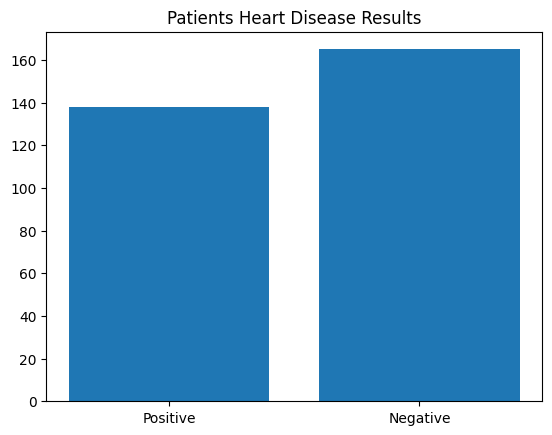

In [5]:
# Check whether this dataset is balanced or not
# (use the bar plot to visualize the number of positive and negative samples)

import matplotlib.pyplot as plt

counts = df['target'].value_counts()

plt.bar(counts.index, counts.values)
plt.title('Patients Heart Disease Results')
plt.xticks(counts.index, ['Negative', 'Positive'])
plt.show()

The dataset is balanced.

### 2.2 Split the data into two subsets and normalize the features of samples

* Split the dataset into the train_val set and testing set.
* Normalize features

In [6]:
# Split the dataset into the train_val set and testing set
heart_data = df.drop('target', axis=1).values
heart_targets = df['target'].values
X_train_val, X_test, y_train_val, y_test = train_test_split(heart_data, heart_targets,
                                                            test_size=0.10,
                                                            random_state=0)

print("train_val: {}, test: {}".format(X_train_val.shape[0], X_test.shape[0]))

# Normalize features
normalizer = StandardScaler()
X_train_val = normalizer.fit_transform(X_train_val)
X_test = normalizer.transform(X_test)

train_val: 272, test: 31


### 2.3 Train the KNN model and select the hyperparameter with cross-validation


* Use the 5-fold cross-validation to select the hyperparameter $K$.
* Search $K$ from $\{1, 2, 3, 4, 5\}$


In [7]:
# Use the 5-fold cross-validation to select the hyperparameter 𝐾
# 𝐾: {1, 2, 3, 4, 5}
k_range = range(1, 6)
param_grid = dict(n_neighbors = k_range)

clf_knn =  KNeighborsClassifier(n_neighbors = 1)

grid = GridSearchCV(clf_knn, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_val, y_train_val)

print(grid.best_score_)
print(grid.best_params_)

0.831043771043771
{'n_neighbors': 5}


### 2.4 Evaluate the learned model

* Report the prediction accuracy, recall, precision, and F1 score.

* Note that you should implement the code for these metrics by yourself. Please do NOT use the built-in function in sklearn.

In [9]:
# Model evaluation
clf_knn =  KNeighborsClassifier(n_neighbors=grid.best_params_['n_neighbors'])
clf_knn.fit(X_train_val, y_train_val)

# Evaluate model using testing set
y_test_pred = clf_knn.predict(X_test)

# Count results
def counts(y_true, y_pred):
    TP, FP, TN, FN = 0, 0, 0, 0
    for i in range(len(y_true)):
        if y_true[i] == y_pred[i]:
            if y_true[i] == 1:
                TP += 1
            else:
                TN += 1
        else:
            if y_true[i] == 1:
                FP += 1
            else:
                FN += 1
    print("true positive: {}, true negative: {}, false positive: {}, false negative: {} | total: {}".format(TP, TN, FP, FN, (TP+TN+FP+FN)))
    accuracy = (TP + TN) / (TP + FP + TN + FN)
    recall = TP / (TP + FN)
    precision = TP / (TP + FP)
    f1_score = 2 * (precision * recall) / (precision + recall)
    return accuracy, recall, precision, f1_score

# Report the prediction accuracy, recall, precision, and F1 score
accuracy, recall, precision, f1 = counts(y_test, y_test_pred)

print("accuracy: {:.3f}, recall: {:.3f}, precision: {:.3f}, f1: {:.3f}".format(accuracy, recall, precision, f1))

true positive: 11 true negative: 15 false positive: 3 false negative: 2 | total: 31
accuracy: 0.839, recall: 0.846, precision: 0.786, f1: 0.815
